## Assignment 3: Evaluating Classification Models
NOTE : PLEASE DO NOT POST/SHARE THE CODE OR YOUR SOLUTIONS ON THE WEB/GIT except CANVAS FOR GRADING

References : 
https://rpubs.com/MatthewDSmith22/634473
https://medium.com/@ogbeide331/bank-marketing-campaign-prediction-using-logistic-regression-d3a1072ac155
https://github.com/prakhardogra921/Bank-Marketing-Classification#readme
https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226


Problem Statement :  Identify the list of banking clients that appear to be the best target for direct marketing efforts 

Background Materials/Data: Bank Marketing Study
For this assignment you are asked to fit classification models to data from the Bank Marketing Study, as described in the miller_mds_bank_marketing_study-1.pdf handout.

Instructions:
Use three binary explanatory variables relating to client banking history: default, housing, and loan. 
- Predict the binary response variable: Has the client subscribed to a term deposit? 
- Use all banking client observations with complete data for these study variables. 

Employ two classification methods: 
(1) logistic regression as described in Chapter 4 of the Géron (2017) textbook and 
(2) naïve Bayes classification. Evaluate these methods within a cross-validation design, 
using the area under the receiver operating characteristic (ROC) curve as an index of classification performance. 

Regarding the management problem, imagine that you are advising the bank about machine learning methods to guide telephone marketing campaigns: 
- Which of the two modeling methods would you recommend and why? 
- And, given the results of your research, which group of banking clients appears to be the best target for direct marketing efforts (similar to those used with previous telephone campaigns)? 

 
Deliverables and File Formats
- Python notebook that address the problem and the writeup as indicated towards the end of this notebook (Audience:Director Data Science/Analytics)

AND (Audience:Business/C-Suite)
1. Provide a double-spaced paper with a two-page maximum for the text. The paper in pdf format should include 
    (1) Summary and problem definition for management; 
    (2) Discussion of the methodology, data findings and traditional machine learning methods employed; 
    (3) List assumptions, programming work, issues along with model evaluation metrics; and 
    (4) Review of results/ insight swith recommendations for management.

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.iostyleguide/pyguide.html) for ideas about formatting Python code:


NOTE : 
- Below is the starter code and please feel free to update/edit/change to provide your thoughts/solutions to the problem. 
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the programming methods being employed.
- This code has a lot of errors (intentionally, including the data dictionary) make sure to updated all the cells based on best practices along with your analysis/findings.


GRADING GUIDELINES (100 points)
--------------------------------
(1) Data preparation, exploration, visualization (20 points)
(2) Review research design and modeling methods (20 points)
(3) Review results, evaluate models (20 points)
(4) Implementation and programming (20 points)
(5) Exposition, problem description, and management recommendations (20 points)


In [1]:
# Bank Marketing Study as described in Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python (Miller 2015)
# https://www.amazon.com/Marketing-Data-Science-Techniques-Predictive/dp/0133886557 

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [3]:
###Loading Packages###
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import base packages into the namespace for this program
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from pandas.plotting import scatter_matrix

In [4]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [5]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [6]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#S3 Establish working directory
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/Assignments/3/
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/My Drive/Assignments/3/"

In [29]:
# initial work with the data set
bank = pd.read_csv(work_dir+'./data/bank.csv', sep = ';')

# print first few rows of df 
bank.head()
bank.info()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  response   4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [30]:
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [31]:
# # drop observations with missing data, if any
# bank.dropna()

# examine the shape of original input data
bank.shape

(4521, 17)

In [32]:
# look at the list of column names, note that y is the response
list(bank.columns.values)

# look at the beginning of the DataFrame
bank.head()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [33]:
# Descriptive Statistics for non-categorical variables
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


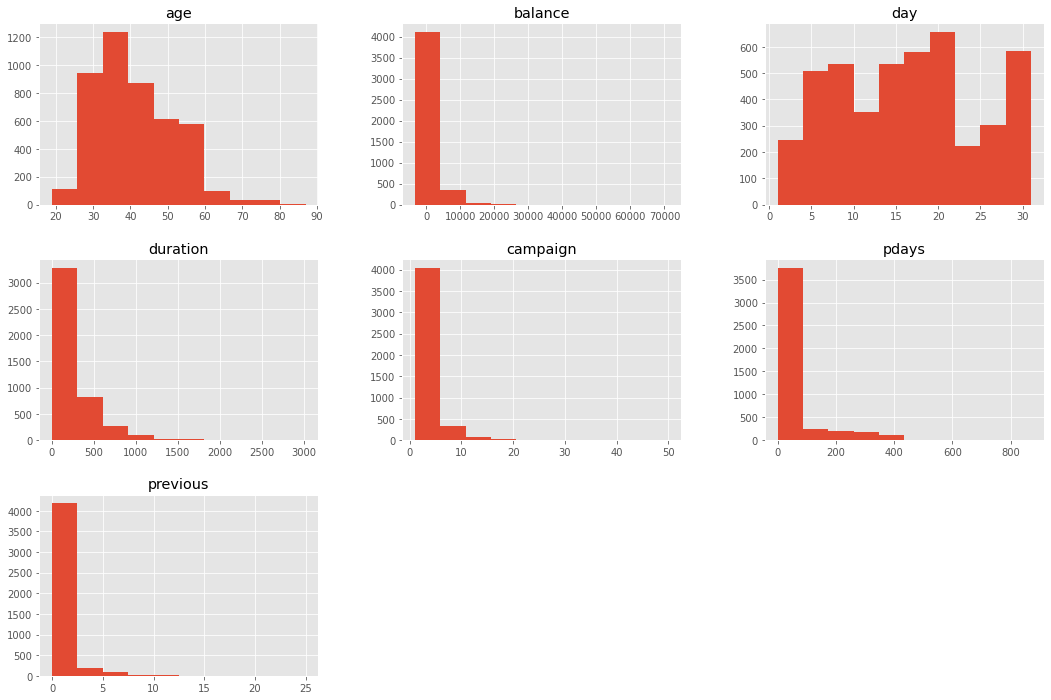

In [34]:
# Check distributions of non-categorical variables
bank.hist(figsize=(18,12));

In [35]:
bank['response'].value_counts()

no     4000
yes     521
Name: response, dtype: int64

<Figure size 432x288 with 0 Axes>

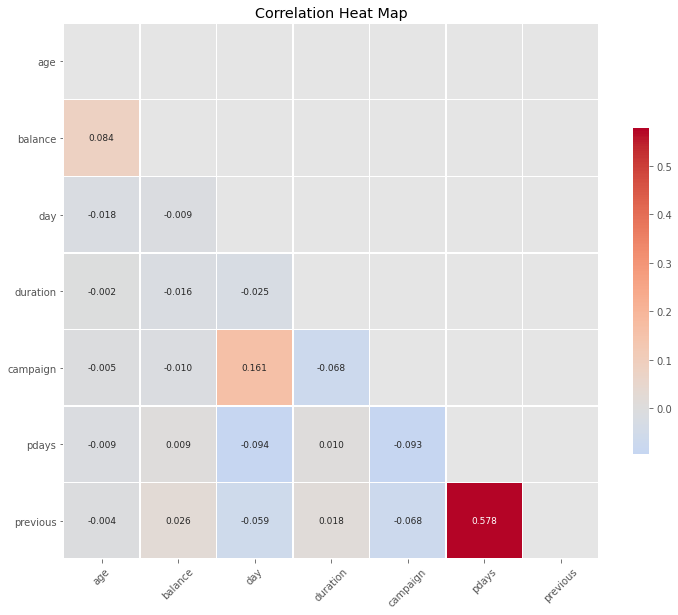

In [36]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# examine correlations
corr_chart(df_corr = bank) 

In [37]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

(4521, 4)


In [38]:
#Check "model_data" structure
print(model_data)

[[0 0 0 0]
 [0 1 1 0]
 [0 1 0 0]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 1 1 0]]


In [39]:
# Check the frequency of "default", "loan", "housing" by "response"
(pd.crosstab([bank['default'],bank['loan'],bank['housing']], [bank['response']], margins=True))

# pd.crosstab([bank['default'],bank['loan'],bank['housing']],columns=bank['response'])

# # Check the frequency of "default", "loan", "housing" by "response"
# print(pd.crosstab([bank['default'],bank['loan'],bank['housing']], [bank['response']], margins=True))

response                no  yes   All
default loan housing                 
no      no   no       1381  279  1660
             yes      1927  192  2119
        yes  no        255   16   271
             yes       370   25   395
yes     no   no         13    4    17
             yes        31    3    34
        yes  no         12    2    14
             yes        11    0    11
All                   4000  521  4521

In [40]:
ct = (pd.crosstab([bank['default'],bank['loan'],bank['housing']], 
                  [bank['response']], margins=True))
ct_nm = (pd.crosstab([bank['default'],bank['loan'],bank['housing']], 
                  [bank['response']], margins=False))
ct2 = pd.crosstab(bank.response,bank.default)
ct3 = pd.crosstab(bank.response,bank.loan)
ct4 = pd.crosstab(bank.response,bank.housing)

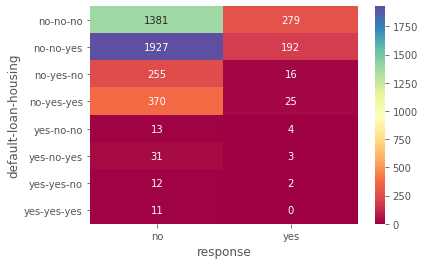

<Figure size 432x288 with 0 Axes>

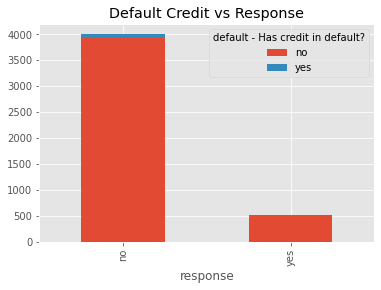

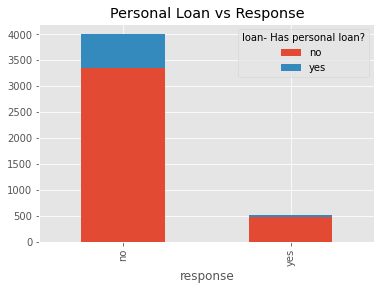

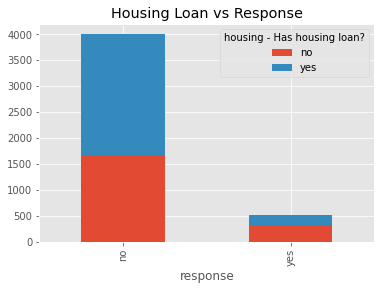

In [41]:
plt.figure()
sns.heatmap(ct_nm,cmap="Spectral", annot=True, cbar=True,fmt='g');

plt.figure()
ct2.plot.bar(stacked=True)
plt.legend(title='default - Has credit in default?')
plt.title("Default Credit vs Response")
plt.show();

ct3.plot.bar(stacked=True)
plt.legend(title='loan- Has personal loan?')
plt.title("Personal Loan vs Response")
plt.show();

ct4.plot.bar(stacked=True)
plt.legend(title='housing - Has housing loan?')
plt.title("Housing Loan vs Response")
plt.show();


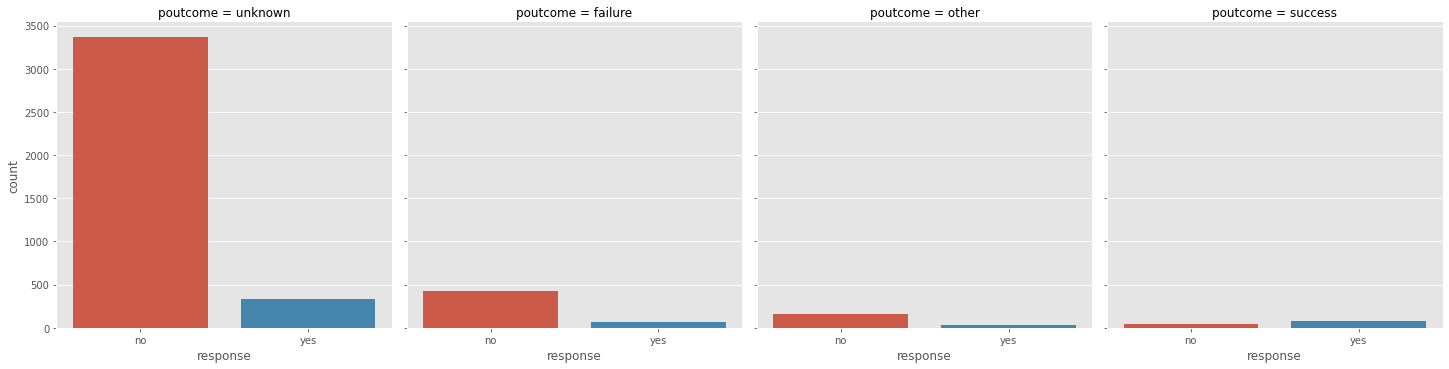

In [42]:
sns.catplot(x="response", col="poutcome", data=bank, kind="count")

####  The rest of the program should set up the modeling methods & evaluation within a cross-validation design

In [43]:
# shuffle is by the first index, which is the rows
np.random.seed(RANDOM_SEED)
# np.random.shuffle(model_data)

# dimensions of the additive model X input and y response
print('\nData dimensions:', model_data.shape)

# --------------------------------------------------------


Data dimensions: (4521, 4)


In [44]:
# cross-validation scoring code adapted from Scikit Learn documentation
from sklearn.metrics import roc_auc_score

# specify the set of classifiers being evaluated


In [ ]:
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold


# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    


print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean())   



Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5878522062732588

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.5878522062732588

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.633727778967659

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.633727778967659

Fold index: 2 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.6575354454752319

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.6575354454752319

Fold index: 3 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.6373879576644552

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.6355648959335594

Fold index: 4 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5743993962517295

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.5743993962517295

Fold index: 5 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5746839950151327

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.5842383241350662

Fold index: 6 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5625116322352502

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.5625116322352502

Fold index: 7 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.7311441622103387

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.7311441622103387

Fold index: 8 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5735328888258382

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.5735328888258382

Fold index: 9 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5778268860493612

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Area under ROC curve: 0.5768204095921582

----------------------------------------------
Average results from 10-fold cross-validation

Method                 Area under ROC Curve
Naive_Bayes            0.611060
Logistic_Regression    0.611733
dtype: float64


In [ ]:
#Precision and Recall
from sklearn.metrics import precision_recall_curve

In [ ]:
# Use Precision Recall to set Threshold
from sklearn.model_selection import cross_val_predict


### Bank Marketing Study: 
Imagine that you are advising the bank about machine learning methods to guide telephone marketing campaigns: 
- Which of the two modeling methods would you recommend and why? 
- And, given the results of your research, which group of banking clients appears to be the best target for direct marketing 
  efforts (similar to those used with previous telephone campaigns)? 

#### REPORT/FINDINGS: 

##### (1) A summary and problem definition for management; 


---
##### (2) Discussion of the methodology, data findings and traditional machine learning methods employed; 


---
##### (3) List assumptions, programming work, issues along with model evaluation metrics; and 


---
##### (4) Review of results/ insight swith recommendations for management
